# POVERTY SOMETHING

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
#from matplotlib_venn import venn2

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# user written modules
import Petra

# Read and clean data

First we show what we do with the first set of data, then we do the same for all the other datasets, the only difference is the age-range considered. We do this to enable us to later merge the data with the different age-range specified

In [2]:
filename = 'relative_poverty.xlsx'
rp_tot = pd.read_excel(filename, sheet_name= 'Age-total')
rp_tot

,Unnamed: 0,2015,2016,2017,2018,2019,2020,2021,2022
0,All Denmark,3.6,4.0,4.5,4.4,4.4,4.2,4.0,3.7
1,Capital municipalities,4.0,4.3,4.7,4.7,4.7,4.5,4.3,4.0
2,Metropolitan municipalities,4.0,4.4,5.0,5.1,5.2,5.0,5.0,4.6
3,Provincial municipalities,3.4,3.8,4.3,4.2,4.1,4.0,3.8,3.5
4,Commuter municipalities,2.7,3.2,3.7,3.5,3.5,3.3,3.1,2.9
...,...,...,...,...,...,...,...,...,...
99,Morsø,3.6,4.4,4.5,3.9,3.8,3.5,4.0,3.1
100,Rebild,2.2,2.3,2.8,2.6,2.6,2.5,2.1,1.9
101,Thisted,3.4,3.8,4.2,4.2,4.0,4.0,3.7,3.2
102,Vesthimmerlands,4.0,4.2,4.3,4.4,4.1,3.9,3.7,3.3


In [3]:
# Rename columns by specifying a function
# Lambda function to modify the column names
# rp_tot.columns = rp_tot.columns.map(lambda x: x + '_rp_tot' if x.isdigit() else x)
# rp_tot
rp_tot.columns = rp_tot.columns.map(lambda x: 'location' if x == 'Unnamed: 0' else x + '_rp_tot' if x.isdigit() else x)
rp_tot

,location,2015_rp_tot,2016_rp_tot,2017_rp_tot,2018_rp_tot,2019_rp_tot,2020_rp_tot,2021_rp_tot,2022_rp_tot
0,All Denmark,3.6,4.0,4.5,4.4,4.4,4.2,4.0,3.7
1,Capital municipalities,4.0,4.3,4.7,4.7,4.7,4.5,4.3,4.0
2,Metropolitan municipalities,4.0,4.4,5.0,5.1,5.2,5.0,5.0,4.6
3,Provincial municipalities,3.4,3.8,4.3,4.2,4.1,4.0,3.8,3.5
4,Commuter municipalities,2.7,3.2,3.7,3.5,3.5,3.3,3.1,2.9
...,...,...,...,...,...,...,...,...,...
99,Morsø,3.6,4.4,4.5,3.9,3.8,3.5,4.0,3.1
100,Rebild,2.2,2.3,2.8,2.6,2.6,2.5,2.1,1.9
101,Thisted,3.4,3.8,4.2,4.2,4.0,4.0,3.7,3.2
102,Vesthimmerlands,4.0,4.2,4.3,4.4,4.1,3.9,3.7,3.3


In [4]:
#Here we import all the datasets on relative poverty, but considering the data for different age ranges
rp_17 = pd.read_excel(filename, sheet_name= '0-17')
rp_29 = pd.read_excel(filename, sheet_name= '18-29')
rp_39 = pd.read_excel(filename, sheet_name= '30-39')
rp_49 = pd.read_excel(filename, sheet_name= '40-49')
rp_59 = pd.read_excel(filename, sheet_name= '50-59')
rp_69 = pd.read_excel(filename, sheet_name= '60-69')
rp_79 = pd.read_excel(filename, sheet_name= '70-79')
rp_80 = pd.read_excel(filename, sheet_name= '80-onwards')

In [5]:
def rename_columns(df, suffix):
    df.columns = df.columns.map(lambda x: 'location' if x == 'Unnamed: 0' else str(x) + suffix)
    return df

# Apply the renaming function to each DataFrame
rp_17 = rename_columns(rp_17, '_rp_17')
rp_29 = rename_columns(rp_29, '_rp_29')
rp_39 = rename_columns(rp_39, '_rp_39')
rp_49 = rename_columns(rp_49, '_rp_49')
rp_59 = rename_columns(rp_59, '_rp_59')
rp_69 = rename_columns(rp_69, '_rp_69')
rp_79 = rename_columns(rp_79, '_rp_79')
rp_80 = rename_columns(rp_80, '_rp_80')

rp_17

,location,2015_rp_17,2016_rp_17,2017_rp_17,2018_rp_17,2019_rp_17,2020_rp_17,2021_rp_17,2022_rp_17
0,All Denmark,3.8,4.6,5.6,5.4,5.3,5.0,4.7,4.2
1,Capital municipalities,3.9,4.3,5.2,5.0,5.0,4.8,4.5,4.0
2,Metropolitan municipalities,4.1,4.8,6.3,6.1,6.3,5.8,5.7,5.1
3,Provincial municipalities,3.5,4.3,5.3,5.1,4.9,4.7,4.5,3.9
4,Commuter municipalities,3.0,3.9,4.9,4.6,4.6,4.2,4.0,3.6
...,...,...,...,...,...,...,...,...,...
99,Morsø,5.7,7.5,8.1,6.5,5.9,5.1,6.5,4.7
100,Rebild,2.1,2.2,3.2,3.4,3.2,3.3,2.4,2.3
101,Thisted,4.5,5.0,6.0,6.2,5.6,5.6,4.9,3.9
102,Vesthimmerlands,5.6,6.0,6.2,6.0,5.9,5.5,4.9,4.3


In [6]:
#Here we compute the same operations but using the Net Wealth dataset instead:

filename2 = 'net_wealth.xlsx'
nw_18_over = pd.read_excel(filename2, sheet_name= '18-over')

#Renaming columns
nw_18_over.columns = nw_18_over.columns.map(lambda x: 'location' if x == 'Unnamed: 0' else x + '_nw_18_over' if x.isdigit() else x)

#Here we import all the datasets on net-wealth, but considering the data for different age ranges
nw_29 = pd.read_excel(filename2, sheet_name= '18-29')
nw_39 = pd.read_excel(filename2, sheet_name= '30-39')
nw_49 = pd.read_excel(filename2, sheet_name= '40-49')
nw_59 = pd.read_excel(filename2, sheet_name= '50-59')
nw_69 = pd.read_excel(filename2, sheet_name= '60-69')
nw_79 = pd.read_excel(filename2, sheet_name= '70-79')
nw_80 = pd.read_excel(filename2, sheet_name= '80-onwards')

def rename_columns(df, suffix):
    df.columns = df.columns.map(lambda x: 'location' if x == 'Unnamed: 0' else str(x) + suffix)
    return df

# Apply the renaming function to each DataFrame
nw_29 = rename_columns(nw_29, '_nw_29')
nw_39 = rename_columns(nw_39, '_nw_39')
nw_49 = rename_columns(nw_49, '_nw_49')
nw_59 = rename_columns(nw_59, '_nw_59')
nw_69 = rename_columns(nw_69, '_nw_69')
nw_79 = rename_columns(nw_79, '_nw_79')
nw_80 = rename_columns(nw_80, '_nw_80')

In [7]:
#Here we compute the same operations but using the Negative Net Dataset instead:
filename3 = 'neg_net_wealth.xlsx'
nnw_18_over = pd.read_excel(filename3, sheet_name= '18-over')

#Renaming columns
nnw_18_over.columns = nnw_18_over.columns.map(lambda x: 'location' if x == 'Unnamed: 0' else x + '_nnw_18_over' if x.isdigit() else x)

#Here we import all the datasets on net-wealth, but considering the data for different age ranges
nnw_29 = pd.read_excel(filename2, sheet_name= '18-29')
nnw_39 = pd.read_excel(filename2, sheet_name= '30-39')
nnw_49 = pd.read_excel(filename2, sheet_name= '40-49')
nnw_59 = pd.read_excel(filename2, sheet_name= '50-59')
nnw_69 = pd.read_excel(filename2, sheet_name= '60-69')
nnw_79 = pd.read_excel(filename2, sheet_name= '70-79')
nnw_80 = pd.read_excel(filename2, sheet_name= '80-onwards')

def rename_columns(df, suffix):
    df.columns = df.columns.map(lambda x: 'location' if x == 'Unnamed: 0' else str(x) + suffix)
    return df

# Apply the renaming function to each DataFrame
nnw_29 = rename_columns(nnw_29, '_nnw_29')
nnw_39 = rename_columns(nnw_39, '_nnw_39')
nnw_49 = rename_columns(nnw_49, '_nnw_49')
nnw_59 = rename_columns(nnw_59, '_nnw_59')
nnw_69 = rename_columns(nnw_69, '_nnw_69')
nnw_79 = rename_columns(nnw_79, '_nnw_79')
nnw_80 = rename_columns(nnw_80, '_nnw_80')

# Merge Datasets

Here we combine our datasets on relative poverty, in order to have just one with all the different age ranges specified

In [8]:
datasets = [rp_17, rp_29, rp_39, rp_49, rp_59, rp_69, rp_79, rp_80]

# Initialize the merged dataset with the first dataset
merged_rp = rp_tot

# Iterate over each dataset and merge with the merged dataset
for dataset in datasets:
    merged_rp = merged_rp.merge(dataset, on='location')

# Print the merged dataset
merged_rp

,location,2015_rp_tot,2016_rp_tot,2017_rp_tot,2018_rp_tot,2019_rp_tot,2020_rp_tot,2021_rp_tot,2022_rp_tot,2015_rp_17,...,2021_rp_79,2022_rp_79,2015_rp_80,2016_rp_80,2017_rp_80,2018_rp_80,2019_rp_80,2020_rp_80,2021_rp_80,2022_rp_80
0,All Denmark,3.6,4.0,4.5,4.4,4.4,4.2,4.0,3.7,3.8,...,0.8,0.7,0.7,0.7,0.7,0.7,0.7,0.8,1.0,0.8
1,Capital municipalities,4.0,4.3,4.7,4.7,4.7,4.5,4.3,4.0,3.9,...,1.1,0.9,1.0,0.9,1.0,0.9,0.9,1.0,1.3,1.0
2,Metropolitan municipalities,4.0,4.4,5.0,5.1,5.2,5.0,5.0,4.6,4.1,...,0.8,0.6,0.9,0.8,0.9,0.7,0.9,0.8,1.2,0.9
3,Provincial municipalities,3.4,3.8,4.3,4.2,4.1,4.0,3.8,3.5,3.5,...,0.7,0.6,0.6,0.6,0.7,0.6,0.7,0.7,0.9,0.7
4,Commuter municipalities,2.7,3.2,3.7,3.5,3.5,3.3,3.1,2.9,3.0,...,0.6,0.5,0.7,0.6,0.6,0.6,0.6,0.7,0.9,0.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,Morsø,3.6,4.4,4.5,3.9,3.8,3.5,4.0,3.1,5.7,...,1.0,0.4,0.4,0.3,0.4,0.4,0.8,0.2,0.8,0.4
100,Rebild,2.2,2.3,2.8,2.6,2.6,2.5,2.1,1.9,2.1,...,0.7,0.4,0.2,0.4,0.4,0.3,0.2,0.8,0.7,0.6
101,Thisted,3.4,3.8,4.2,4.2,4.0,4.0,3.7,3.2,4.5,...,0.7,0.7,0.4,0.4,0.5,0.5,0.5,0.7,0.9,0.6
102,Vesthimmerlands,4.0,4.2,4.3,4.4,4.1,3.9,3.7,3.3,5.6,...,0.8,0.5,0.3,0.4,0.2,0.5,0.6,1.0,0.7,0.6


In [9]:
#Mearging datasets on net wealth:
datasets = [nw_29, nw_39, nw_49, nw_59, nw_69, nw_79, nw_80]

# Initialize the merged dataset with the first dataset
merged_nw = nw_18_over

# Iterate over each dataset and merge with the merged dataset
for dataset in datasets:
    merged_nw = merged_nw.merge(dataset, on='location')

merged_nw

,location,2014_nw_18_over,2015_nw_18_over,2016_nw_18_over,2017_nw_18_over,2018_nw_18_over,2019_nw_18_over,2020_nw_18_over,2021_nw_18_over,2022_nw_18_over,...,2022_nw_79,2014_nw_80,2015_nw_80,2016_nw_80,2017_nw_80,2018_nw_80,2019_nw_80,2020_nw_80,2021_nw_80,2022_nw_80
0,All Denmark,424030,457967,493166,531665,547467,611289,675175,752900,701429,...,1520929,648413,672649,697826,736633,766356,808149,845385,920742,940050
1,Capital municipalities,445701,490596,521797,553036,563836,614787,680900,739423,674498,...,2099157,814068,863468,911708,971776,1013982,1087798,1155454,1273427,1315086
2,Metropolitan municipalities,263825,286329,304603,322136,325931,357030,398168,442355,409333,...,1663841,639565,673838,709351,761071,811235,860951,896564,973515,998729
3,Provincial municipalities,426021,460731,499840,544270,565146,637419,703306,790697,738875,...,1471643,636139,660681,684158,720911,746390,792604,831236,899056,919090
4,Commuter municipalities,502740,538153,586441,641036,667947,752423,827744,936478,880420,...,1520070,660809,676931,705964,750415,779973,819805,857582,938813,950745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,Morsø,435593,481452,508168,551551,552895,607091,665579,724721,703391,...,1140245,526975,583032,574841,608875,610089,633435,659651,718213,755686
100,Rebild,577328,588561,655969,677211,720565,776218,835553,940358,908467,...,1489972,776646,743555,780614,801784,870791,886305,877149,922561,921536
101,Thisted,450150,483470,503645,556315,556535,616586,690912,772782,726938,...,1223738,586715,616287,634118,668981,674757,718238,749098,802818,797500
102,Vesthimmerlands,440199,443381,491206,531309,534216,615582,672841,749516,723450,...,1241721,592607,581605,624418,639834,627717,673381,673327,723523,733795


In [10]:
#Merging datasets on negative net wealth
datasets = [nnw_29, nnw_39, nnw_49, nnw_59, nnw_69, nnw_79, nnw_80]

# Initialize the merged dataset with the first dataset
merged_nnw = nnw_18_over

# Iterate over each dataset and merge with the merged dataset
for dataset in datasets:
    merged_nnw = merged_nnw.merge(dataset, on='location')


In [11]:
# For explanatory reasons:
# We now have three datasets:

# merged_rp: which contains all the data on relative-poverty divided also by age ranges
# merged_nw: which contains all the data on net wealth divided also by age ranges
# merged_nnw: which contains all the data on negative net wealth divided also by age ranges

SLICING: Cutting off extra municipalities

In [12]:
merged_nw

,location,2014_nw_18_over,2015_nw_18_over,2016_nw_18_over,2017_nw_18_over,2018_nw_18_over,2019_nw_18_over,2020_nw_18_over,2021_nw_18_over,2022_nw_18_over,...,2022_nw_79,2014_nw_80,2015_nw_80,2016_nw_80,2017_nw_80,2018_nw_80,2019_nw_80,2020_nw_80,2021_nw_80,2022_nw_80
0,All Denmark,424030,457967,493166,531665,547467,611289,675175,752900,701429,...,1520929,648413,672649,697826,736633,766356,808149,845385,920742,940050
1,Capital municipalities,445701,490596,521797,553036,563836,614787,680900,739423,674498,...,2099157,814068,863468,911708,971776,1013982,1087798,1155454,1273427,1315086
2,Metropolitan municipalities,263825,286329,304603,322136,325931,357030,398168,442355,409333,...,1663841,639565,673838,709351,761071,811235,860951,896564,973515,998729
3,Provincial municipalities,426021,460731,499840,544270,565146,637419,703306,790697,738875,...,1471643,636139,660681,684158,720911,746390,792604,831236,899056,919090
4,Commuter municipalities,502740,538153,586441,641036,667947,752423,827744,936478,880420,...,1520070,660809,676931,705964,750415,779973,819805,857582,938813,950745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,Morsø,435593,481452,508168,551551,552895,607091,665579,724721,703391,...,1140245,526975,583032,574841,608875,610089,633435,659651,718213,755686
100,Rebild,577328,588561,655969,677211,720565,776218,835553,940358,908467,...,1489972,776646,743555,780614,801784,870791,886305,877149,922561,921536
101,Thisted,450150,483470,503645,556315,556535,616586,690912,772782,726938,...,1223738,586715,616287,634118,668981,674757,718238,749098,802818,797500
102,Vesthimmerlands,440199,443381,491206,531309,534216,615582,672841,749516,723450,...,1241721,592607,581605,624418,639834,627717,673381,673327,723523,733795


In [13]:
#Here we sliced the dataset for net-wealth in order to keep just the first rows, excluding all the municipalities
merged_nw_final = merged_nw.iloc[:7]
merged_nw_final

,location,2014_nw_18_over,2015_nw_18_over,2016_nw_18_over,2017_nw_18_over,2018_nw_18_over,2019_nw_18_over,2020_nw_18_over,2021_nw_18_over,2022_nw_18_over,...,2022_nw_79,2014_nw_80,2015_nw_80,2016_nw_80,2017_nw_80,2018_nw_80,2019_nw_80,2020_nw_80,2021_nw_80,2022_nw_80
0,All Denmark,424030,457967,493166,531665,547467,611289,675175,752900,701429,...,1520929,648413,672649,697826,736633,766356,808149,845385,920742,940050
1,Capital municipalities,445701,490596,521797,553036,563836,614787,680900,739423,674498,...,2099157,814068,863468,911708,971776,1013982,1087798,1155454,1273427,1315086
2,Metropolitan municipalities,263825,286329,304603,322136,325931,357030,398168,442355,409333,...,1663841,639565,673838,709351,761071,811235,860951,896564,973515,998729
3,Provincial municipalities,426021,460731,499840,544270,565146,637419,703306,790697,738875,...,1471643,636139,660681,684158,720911,746390,792604,831236,899056,919090
4,Commuter municipalities,502740,538153,586441,641036,667947,752423,827744,936478,880420,...,1520070,660809,676931,705964,750415,779973,819805,857582,938813,950745
5,Rural municipalities,434080,459278,493614,533313,548307,619998,685015,769117,724881,...,1214014,562871,580077,593826,624559,641458,669179,695483,755697,767749
6,Copenhagen,275998,301918,318158,333743,336942,364425,410386,431725,400015,...,1669989,532882,562387,594097,648806,688361,739501,800485,895335,940126


In [37]:
#Here we change rows and columns for easier visual analysis. 
nw_long = pd.melt(merged_nw_final, id_vars=['location'], var_name='year', value_name='net_wealth')
nw_long

# Perform the split operation and assign it to a temporary variable
split_columns = nw_long['year'].str.split('_', expand=True)

# Combine the last two parts for the 'age_group'
split_columns['age_group'] = split_columns[1] + "_" + split_columns[2]

# Now, assign the first part to 'year' and the combined part to 'age_group'
nw_long['year'] = split_columns[0].astype(int)  # Convert 'year' to an integer
nw_long['age_group'] = split_columns['age_group']

# Create a dictionary to map the current 'age_group' values to the new names.
age_group_renames = {
    'nw_18': 'All age groups',
    'nw_29': '18 - 29',
    'nw_39': '30 - 39',
    'nw_49': '40 - 49',
    'nw_59': '50 - 59',
    'nw_69': '60 - 69',
    'nw_79': '70 - 79',
    'nw_80': '80+'
}

# Update the 'age_group' column in the data for the most recent year.
nw_long['age_group'] = nw_long['age_group'].replace(age_group_renames)

# Check the DataFrame to ensure the changes are as expected
print(nw_long.head())

# Get excel file for visual analysis:
# excel_file_path = '/Users/noahindrehus/Documents/KU Exchange/IPNA/noah.xlsx'
# nw_long.to_excel(excel_file_path, index=False)

                      location  year  net_wealth       age_group
0                  All Denmark  2014      424030  All age groups
1       Capital municipalities  2014      445701  All age groups
2  Metropolitan municipalities  2014      263825  All age groups
3    Provincial municipalities  2014      426021  All age groups
4      Commuter municipalities  2014      502740  All age groups


# Analysis

Noah Analysis:

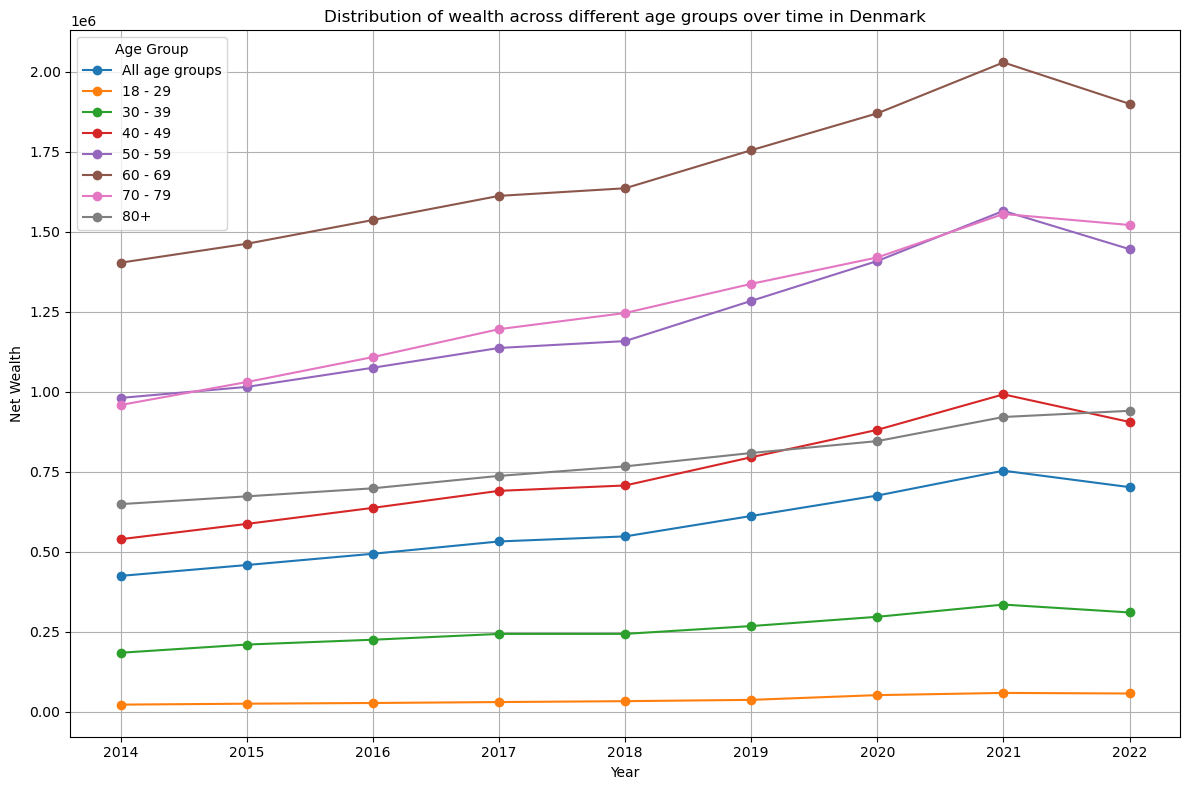

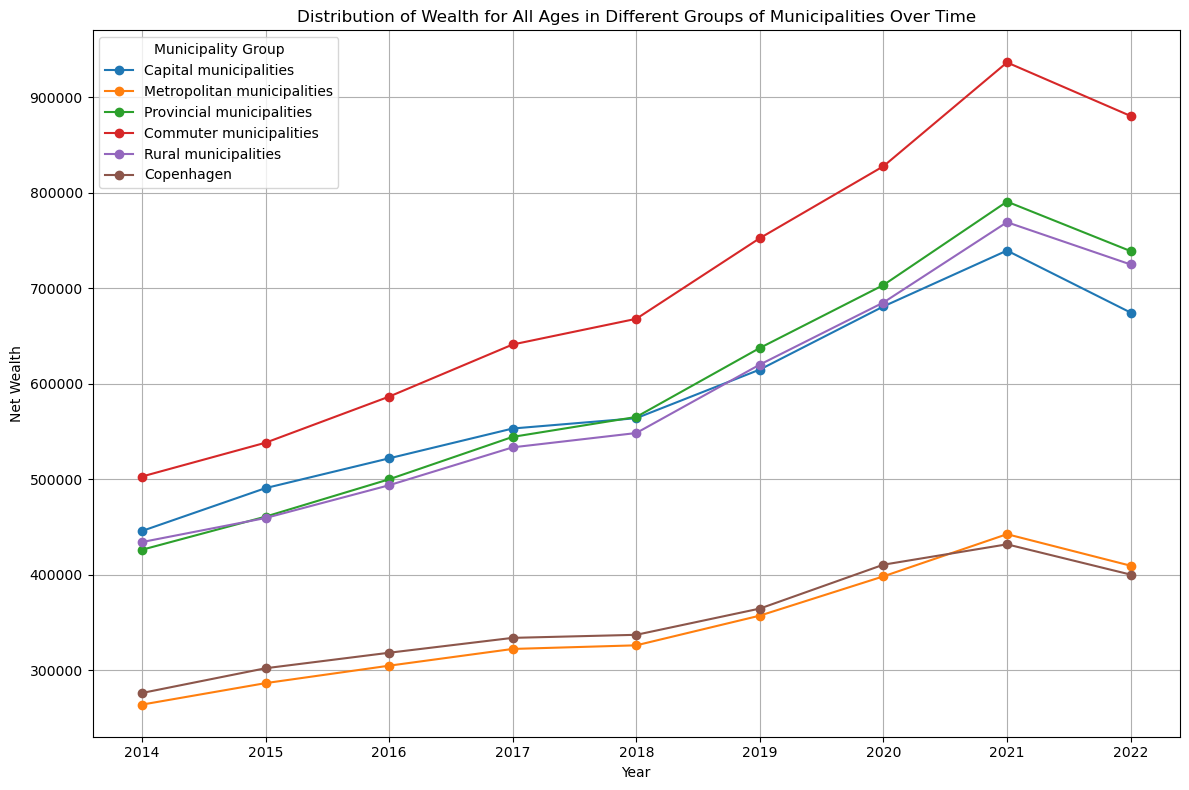

In [42]:
# First graph: Distribution of wealth across ages + time
# Filter the DataFrame for 'All Denmark' to focus on age groups across the entire country
nw_denmark = nw_long[nw_long['location'] == 'All Denmark']

plt.figure(figsize=(12, 8))
for age_group in nw_denmark['age_group'].unique():
    # Select data for each age group
    data = nw_denmark[nw_denmark['age_group'] == age_group]
    plt.plot(data['year'], data['net_wealth'], marker='o', label=age_group)

plt.title('Distribution of wealth across different age groups over time in Denmark')
plt.xlabel('Year')
plt.ylabel('Net Wealth')
plt.legend(title='Age Group')
plt.grid(True)
plt.tight_layout()
plt.show()

# Second graph: Distribution of wealth in different groups of municipalities for all age groups
# Filter for 'all age groups' across selected municipalities
nw_age_18 = nw_long[(nw_long['location'] != 'All Denmark') & (nw_long['age_group'] == 'All age groups')]

plt.figure(figsize=(12, 8))
for location in nw_age_18['location'].unique():
    # Select data for each municipality group
    data = nw_age_18[nw_age_18['location'] == location]
    plt.plot(data['year'], data['net_wealth'], marker='o', label=location)

plt.title('Distribution of Wealth for All Ages in Different Groups of Municipalities Over Time')
plt.xlabel('Year')
plt.ylabel('Net Wealth')
plt.legend(title='Municipality Group')
plt.grid(True)
plt.tight_layout()
plt.show()

For both graphs: the values on the Y-axis are represented in "1e6". This means that the Y-axis values are scaled to represent millions. For instance, a value of 1.0 on the graph corresponds to a net wealth of 1,000,000 in Danish kroner.
The first graph displays the distribution of wealth across different age groups over time in Denmark.
The second graph shows the distribution of wealth for all age groups in different groups of municipalities over time.

The first graph displays a clear progression of wealth accumulation with age, highlighting an expected life-cycle pattern in personal finance: as individuals age, they tend to accumulate wealth, peaking in the 60-69 age bracket. Interestingly, there is a noticeable dip for the 80+ age group, which could indicate a decumulation phase in the later stages of life or possibly generational wealth transfer.

The second graph complements the first by showcasing the disparity in wealth not between ages, but between geographical and political divisions within the country. 

Combined, these graphs illustrate the complexities of wealth accumulation in Denmark, influenced by both age and residential patterns. The rising wealth in commuter municipalities could be interlinked with the wealth accumulation seen in the older age groups, possibly indicating that these areas are favored by individuals who are in the wealth-accumulating phase of their lives.

In [ ]:
rp_tot

In [ ]:
rp_tot_long = pd.melt(rp_tot, id_vars=['location'], var_name='year', value_name='relative_poverty')
rp_tot_long


In [ ]:
# Filter the DataFrame for 'All Denmark'
rp_all_dk = rp_tot_long[rp_tot_long['location'] == 'All Denmark']

# Plot the relative poverty data for 'All Denmark'
rp_all_dk.plot(x='year', y='relative_poverty', legend=False);

In [ ]:
merged_rp

In [ ]:
merged_rp_long = pd.melt(merged_rp, id_vars=['location'], var_name='year', value_name='relative_poverty')
merged_rp_long

In [ ]:
rp_all_dk = merged_rp_long.loc[merged_rp['location'] == 'All Denmark', :]

# Plot the content of the data frame
rp_all_dk.plot(x='year',y='empl',legend=False);

# Conclusion